In [1]:
#The following code fetches MNIST dataset, which is a set of 70000 small images of digits handwritten by high school students and employees of the US Census Bureau.

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


In [3]:
#Datasets loaded by Scikit-Learn have a similar dictionary structure
#A DESCR key describing the dataset
#A data key containing an array with one row per instance and column per feature
#A target
X,y = mnist["data"], mnist["target"]
X.shape
#There are 70000 images, and each has 784 features. This is because is 28*28 pixels, and each feature simply represents one 

(70000, 784)

In [4]:
y.shape

(70000,)

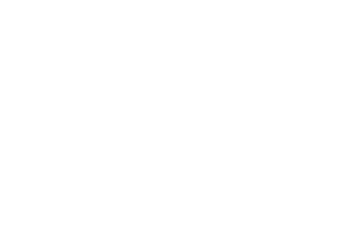

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt 

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.axis("off")
plt.show()

In [6]:
28*28

784

In [7]:
y[0]

'5'

In [8]:
#Label is a string. Most ML algorithms expect numbers, so lets cast y to integer
import numpy as np
y = y.astype(np.uint8)

In [9]:
# creating a test set. MNIST dataset is actually already split into a training set(first 60000 images) and a test set(last 10000 images)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
#Training set is alredy shuffled for us, which is good because this guarantees that all cross-validation folds will be similar.

In [10]:
#Training a Binary Classifier
#Let us try to identify one digit

y_train_5 = (y_train == 5)#True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

In [11]:
#Now lets pick a classifier and train it. A good place to start is with a Stochastic Gradient Descent(SGD) classifier, using Scikit-Learns SGDClassifier class.
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
 sgd_clf.predict([some_digit])

array([ True])

In [13]:
digit = X[10]
sgd_clf.predict([digit])
#It return strue only if the digit at that place is true

array([False])

In [14]:
#Performance Measures
#Evaluating a classifier is more trickier than evaluating a regressor


In [15]:
#Measuring Accuracy Using Cross Validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [16]:
X_train.size

47040000

In [17]:
#Lets look at a very dumb classifier that classifies single image in the "not-5" class:

from sklearn.base import BaseEstimator

class Never5Classofier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [18]:
never_5_clf = Never5Classofier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")
#coz only about 10% of the images are 5's, so if you guess that an image is not a 5, you will be right about 90% of the time. Accuracy is not preferred measure for classifiers.

array([0.91125, 0.90855, 0.90915])

In [25]:
#Confusion Matrix - A much better way to evaluate the performance of a classifier - No of instances of class A are classified as class B.No. of times classifier confused images of 5's as 3's - 5th row and 3rd column of confusion matrix. Its better to make some predictions to compare with the actual results

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

#Just like the cross_val_score() function, cross_val_predict() performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold.

In [26]:
y_train_pred

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)
#Each row represents a actual class and each column represents a predicted class.

array([[5915, 6663, 5976, 5314, 6132, 1340, 6045, 5941, 5633, 5620],
       [  68,   23,   58,  150,   83, 4606,  174,   26,  152,   81],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int64)

In [22]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [23]:
#Precision and Recall
#The confusion matrix gives you a lot of information, but sometimes you may prefer a more concise metric. An interesting one to look at is the accuracy of the positive predictions; this is called the precision of the classifier
# So precision is typically used along with another metric named recall, also called sensitivity or the true positive rate(TPR)

In [58]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred,pos_label= 'positive',average='weighted')

0.8996221466267796

In [59]:
recall_score(y_train_5, y_train_pred,pos_label= 'positive',average='weighted')

0.09896666666666666

In [60]:
#Now 5-detector does not look as shiny as it did when you looked at its accuracy.
#Let us combine precision and recall as F1 score
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred,pos_label= 'positive',average='weighted')

0.1780315918988831

In [ ]:
#Precision/Recall Trade-off
#SGDClassifier makes its classification based on threshold. If score is greater than threshold, it assigns positive and otherwise it is negative. Lowering the threshold increases recall and reduces precision.
#Scikit-Learn does not let you set the threshold directly, but it does give you access to the descision. Instead of calling the classifier’s predict() method, you can call its decision_function() method

In [61]:
y_scores = sgd_clf.decision_function([some_digit])
#This returns score for each instance
y_scores

array([2164.22030239])

In [66]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred
#SGDClassifier uses a threshold equal to 0, so the previous code returns the same result as the predict() method(True)

array([ True])

In [67]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred
# confirms that raising the threshold decreases recall. The image actually represents a 5, and the classifier detects it when the threshold is 0, but it misses it when the threshold is increased to 8,000.

array([False])

In [70]:
#To get threshold use cross_val_predict() function to get the scores of all instances in the taing set, but specify that we want to return decision scores instead of predictions:

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [73]:
#With these scores, use the precision_recall_curve() function to compute precision and recall for all possible thresholds:

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)


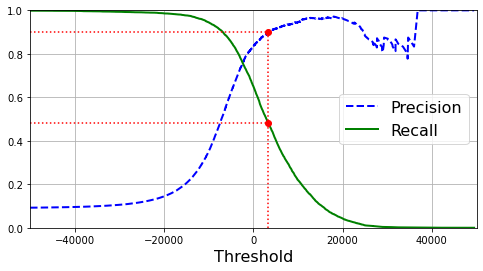

In [80]:

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                               
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                            
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                            
#save_fig("precision_recall_vs_threshold_plot")                                             
plt.show()


In [81]:
(y_train_pred == (y_scores > 0)).all()

False

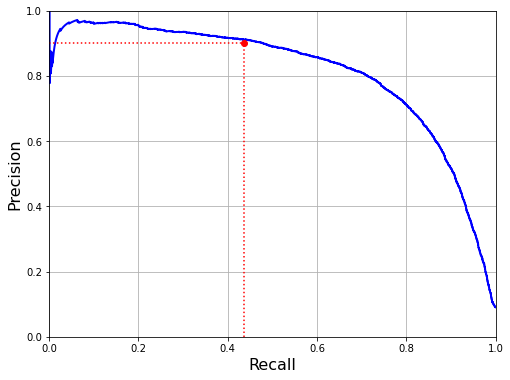

In [84]:
#Another way to select a good precision/recall trade-off is to plot precision directly against recall

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
#save_fig("precision_vs_recall_plot")
plt.show()   

In [86]:
#If we need 90% precision
#np.argmax()-will give you first index of the maximum value

threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [87]:
threshold_90_precision

3370.0194991439594

In [89]:
#To make predictions (on the training set for now), instead of calling the classifier’s predict() method, you can run this code:

y_train_pred_90 = (y_scores >= threshold_90_precision)

In [90]:
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [92]:
precision_score(y_train_5, y_train_pred_90)
#90% precision classifier obtained

0.9000345901072293

In [94]:
 recall_score(y_train_5, y_train_pred_90)
 #By setting threshold, we can get any classifier you want. A high-precision classifier is not very useful if its recall is too low

0.4799852425751706

In [98]:
#ROC(Receiver operating characteristic) Curve is another tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, ROC curve plots the true positive rate against the false positive rate. 

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

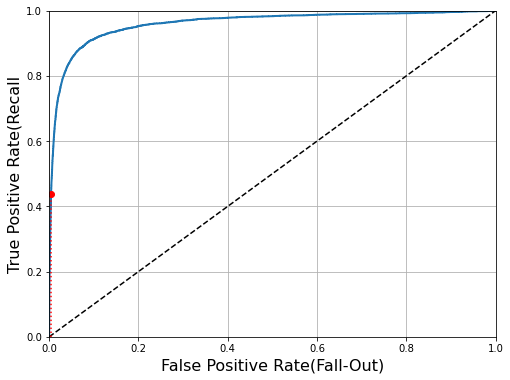

In [100]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate(Fall-Out)',fontsize=16)
    plt.ylabel('True Positive Rate(Recall', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8,6))
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") 
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  
plt.plot([4.837e-3], [0.4368], "ro")               
#save_fig("roc_curve_plot")                         
plt.show()

In [ ]:
#dotted line is a random classifier. A good classifier is alway sfar away from that dotted line
#One way to compare classifiers is to measure the area under the curve. A perfect classifier will have a ROC AUC eual to 1 and random one will have 0.5

In [101]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

#Prefer PR curve when you consentrate more on false positives than false negatives otherwise consider ROC curve

0.9604938554008616

In [102]:
#Lets train RandomForestClassifier and compare with SGD classifier

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3, method="predict_proba")

In [103]:
#roc_curve() function expects labels and scores, but instead of scores you can give class probabilities

y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

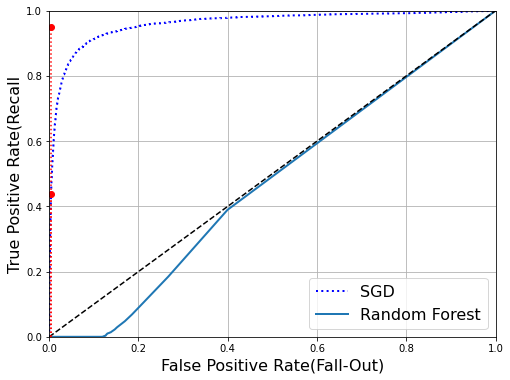

In [106]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.plot([4.837e-3, 4.837e-3], [0., 0.9487], "r:")
plt.plot([4.837e-3], [0.9487], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
#save_fig("roc_curve_comparison_plot")
plt.show()

In [109]:
roc_auc_score(y_train_5, y_scores_forest)

0.46754636002160643